In [2]:
!pwd

/home/jupyter/DeepLearning_tf2


In [25]:
import tensorflow as tf
print(tf.__version__)

2.1.1


In [27]:
#load data
mnist = tf.keras.datasets.mnist
#split data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#normalize values, remember color are between 0 to 255 (1 to 256)
x_train, y_train = x_train/255, y_train/255
#print shape
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [31]:
#build the model
model = tf.keras.models.Sequential([
    #initial input flatten, remember the input shape
    tf.keras.layers.Flatten(input_shape = (28,28)),
    #random dense layer
    tf.keras.layers.Dense(128, activation = 'relu'),
    #selecting dropout
    tf.keras.layers.Dropout(0.2),
    #select the output with 10 posibles values and multiclass softmax
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [35]:
# compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
#train the model
r = model.fit(x_train, 
              y_train, 
              validation_data = (x_test, y_test), 
              epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0036 - accuracy: 0.0986 - val_loss: 6447.9813 - val_accuracy: 0.0980
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 4.4325e-06 - accuracy: 0.0987 - val_loss: 7538.8861 - val_accuracy: 0.0980
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 1.1492e-06 - accuracy: 0.0987 - val_loss: 8393.8043 - val_accuracy: 0.0980
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 5.7652e-07 - accuracy: 0.0987 - val_loss: 9270.5231 - val_accuracy: 0.0980
Epoch 5/10
60000/60000 [==============================] - 6s 95us/sample - loss: 1.0586e-07 - accuracy: 0.0987 - val_loss: 9889.4260 - val_accuracy: 0.0980
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 4.0085e-08 - accuracy: 0.0987 - val_loss: 10539.8342 - val_accuracy: 0.0980
Epoch 7/10
6000

In [42]:
r.history

{'loss': [0.0036402965000547588,
  4.432491832415408e-06,
  1.1491570270926843e-06,
  5.765154597791404e-07,
  1.0586493663211626e-07,
  4.008549555294394e-08,
  2.0658246915298642e-08,
  4.486206002477881e-09,
  3.959694186998301e-09,
  2.2073133732665915e-09],
 'accuracy': [0.098633334,
  0.09871667,
  0.09871667,
  0.09871667,
  0.09871667,
  0.09871667,
  0.09871667,
  0.09871667,
  0.09871667,
  0.09871667],
 'val_loss': [6447.9813375,
  7538.88610625,
  8393.8042703125,
  9270.52305625,
  9889.425971875,
  10539.8341515625,
  11205.52851875,
  11537.5630109375,
  12095.967784375,
  12602.6603125],
 'val_accuracy': [0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098]}

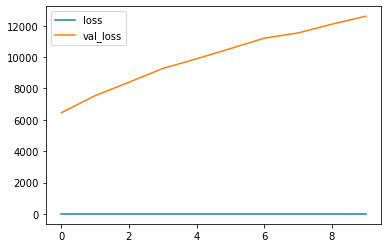

In [46]:
#plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()